Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import datetime
import warnings
warnings.filterwarnings("ignore")




from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

Reading datasets

In [2]:
data=pd.read_csv("Car details(linear_regression).csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


To predict the price for a used car, car name is not important. So we can drop this column. <br><br><br>
Again, horsepower (bhp) affects a vehicle's speed while torque (Nm) impacts the load-bearing capacity. This is why most SUVs and load carrying vehicles use diesel engines as they are capable of generating more torque as compared to petrol counterparts.
<br><br>
But when it comes to buying a vehicle solely based on power and torque specifications, the balance will tilt towards power as it tends to impact the overall performance of a vehicle, especially the acceleration (pick-up).<br>So we can dismiss torque column too and focus on max_power of car.<br><br><br>
We can determine the car age from the year of manufacturing. car age can be easily interpreted and understandable to predict car price.

In [3]:
today = datetime.date.today()
current_year = today.year
print(current_year)

2023


In [4]:
data["current_year"]=current_year
data["car_age"]=data["current_year"]-data["year"]
data["car_age"]

0        9
1        9
2       17
3       13
4       16
        ..
8123    10
8124    16
8125    14
8126    10
8127    10
Name: car_age, Length: 8128, dtype: int64

In [5]:
droplist=["name", "torque", "year", "current_year"]
data.drop(droplist, inplace=True, axis=1)

In [6]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,16


Exploting basic features and statistical values

In [7]:
data.describe()

,selling_price,km_driven,seats,car_age
count,8.128000e+03,8.128000e+03,7907.000000,8128.000000
mean,6.382718e+05,6.981951e+04,5.416719,9.195989
std,8.062534e+05,5.655055e+04,0.959588,4.044249
min,2.999900e+04,1.000000e+00,2.000000,3.000000
25%,2.549990e+05,3.500000e+04,5.000000,6.000000
50%,4.500000e+05,6.000000e+04,5.000000,8.000000
75%,6.750000e+05,9.800000e+04,5.000000,12.000000
max,1.000000e+07,2.360457e+06,14.000000,40.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        7907 non-null   object 
 7   engine         7907 non-null   object 
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
 10  car_age        8128 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


By inspecting the datatypes of all features, we can conclude that, mileage, engine, max_power those 3 features should be in int or float type. To make them, initially we have to remove all strings from each feature and then we have to apply astype() function to make them appropriate.

Since we have two types of unit, i) kmpl and ii)km/kg so we converted km/kg into kmpl byt the formula <br>
kmpl=1.40*(km/kg)

In [9]:
Correct_mileage= []
for i in data.mileage:
    if str(i).endswith("kmpl"):
        i=i.replace('kmpl','')
        Correct_mileage.append(float(i))
    if str(i).endswith("km/kg"):
        i=i.replace('km/kg','')
        i=float(i)*1.40
        Correct_mileage.append(float(i))
    if str(i)=="nan" or str(i)=="Nan" or str(i)=="NaN":
        i=0
        Correct_mileage.append(int(i))
data['mileage']=Correct_mileage

In [10]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,5.0,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,5.0,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,5.0,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,5.0,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,5.0,16


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   engine         7907 non-null   object 
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
 10  car_age        8128 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 698.6+ KB


In [12]:
data['engine']=data['engine'].str.replace('CC','')

In [13]:
Correct_engine= []
for i in data.engine:
    if str(i)=="nan" or str(i)=="Nan" or str(i)=="NaN":
        i=0
        Correct_engine.append(int(i))
    else:
        Correct_engine.append(float(i))
        
data["engine"]=Correct_engine
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,5.0,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,5.0,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,5.0,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,5.0,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,5.0,16


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   engine         8128 non-null   float64
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
 10  car_age        8128 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 698.6+ KB


In [15]:
data['max_power']=data['max_power'].str.replace(' bhp','')


correct_max_power= []
for i in data.max_power:
    if str(i)=="nan" or str(i)=="Nan" or str(i)=="NaN" or str(i)=='' :
        i=0
        correct_max_power.append(int(i))    
    else:
        i=float(i)
        correct_max_power.append(i)
        

        
        
data["max_power"]=correct_max_power   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   engine         8128 non-null   float64
 8   max_power      8128 non-null   float64
 9   seats          7907 non-null   float64
 10  car_age        8128 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [16]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16


We replaced all empty string with 0, to convert it into a float or int datatype. but to see the null values while keeping the data type of the features same, we have to replace all 0 with NaN.

In [17]:
data.replace(0, np.nan, inplace=True)

Making list of intiger/float and object type feature

In [18]:
column_int=[]
column_obj=[]
for col in data:
    dataTypeObj = data.dtypes[col]
    if dataTypeObj == np.int64 or dataTypeObj == np.float64 :
        column_int.append(col)
    if dataTypeObj== np.object:
        column_obj.append(col)

In [19]:
column_int

['selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'car_age']

In [20]:
column_obj

['fuel', 'seller_type', 'transmission', 'owner']

Checking for null values

In [21]:
data.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          238
engine           221
max_power        222
seats            221
car_age            0
dtype: int64

Finding percentage of missing values

In [22]:
percent_missing = data.isnull().sum() * 100 / len(data)
mis_percent=pd.DataFrame(percent_missing.round(2))
mis_percent

,0
selling_price,0.00
km_driven,0.00
fuel,0.00
seller_type,0.00
transmission,0.00
owner,0.00
mileage,2.93
engine,2.72
max_power,2.73
seats,2.72


Handling missing values

In [23]:
data.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          238
engine           221
max_power        222
seats            221
car_age            0
dtype: int64

In [24]:
for i in data[column_int]:
    data[i]=data[i].fillna(data[i].median())

In [25]:
for i in data[column_obj]:
    data[i]=data[i].fillna(data[i].mode())

In [26]:
data.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
car_age          0
dtype: int64

Creating input ant output features

In [27]:
data.shape

(8128, 11)

In [28]:
x=data.drop(["selling_price"], axis=1)
y=data.selling_price


column_int.remove("selling_price")
#we removed output feature name from the list, beacuse in x, the output column name dows not exist

In [29]:
x

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9
1,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9
2,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17
3,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13
4,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16
...,...,...,...,...,...,...,...,...,...,...
8123,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,10
8124,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16
8125,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,14
8126,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,10


In [30]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

Checking for outliers by using boxplot and IQR method

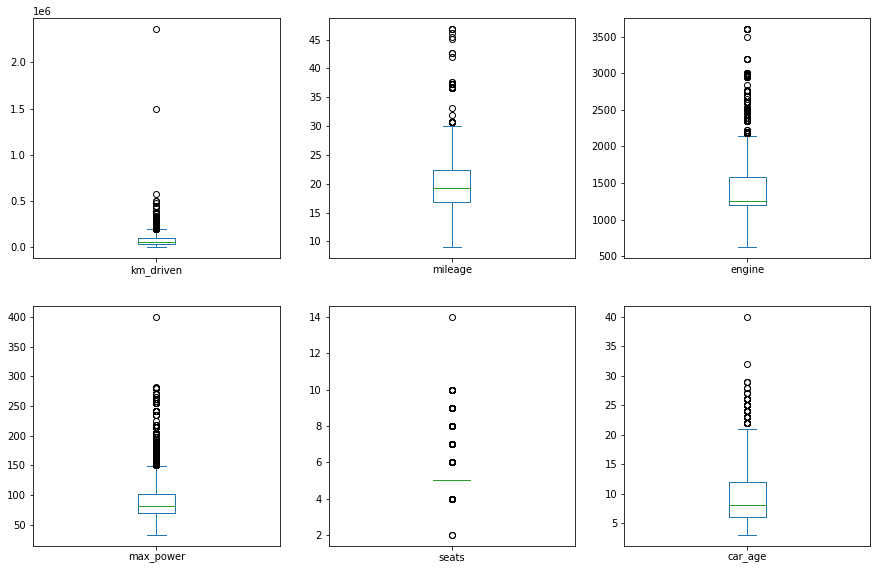

In [31]:
x.plot(kind="box", subplots=True, layout=(3,3), figsize=(15,15));

In [32]:
for i in column_int:
    Q3=np.percentile(x[i], 75)
    Q1=np.percentile(x[i], 25)
    IQR=Q3-Q1
    UB=Q3+(1.5*IQR)
    LB=Q1-(1.5*IQR)

    x[i]=x[i].apply(lambda x:UB if x>UB else x)
    x[i]=x[i].apply(lambda y:LB if y<LB else y)

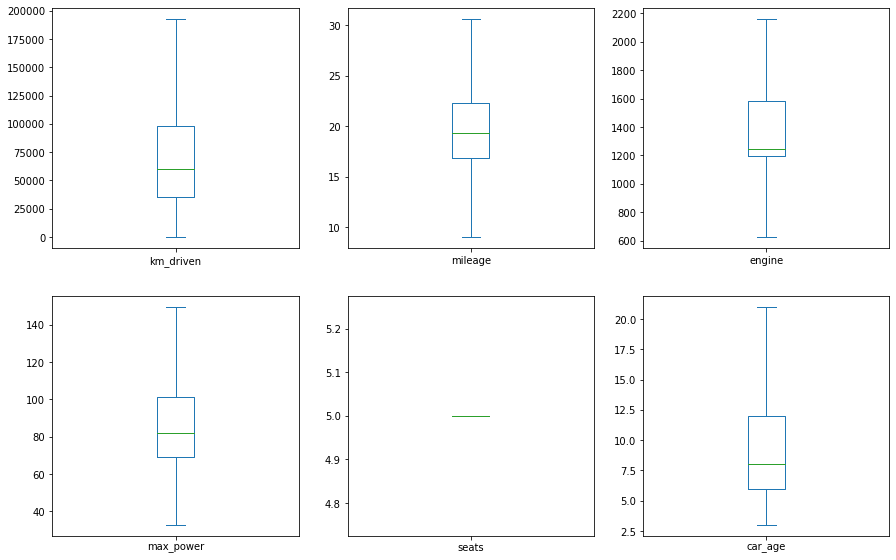

In [33]:
x.plot(kind="box", subplots=True, layout=(3,3), figsize=(15,15));

Before encoding any categorical feature lets check for feature importance

Encode all categorical values

To encode all categorical values, we have to check value counts for each categorical features.

In [34]:
for i in column_obj:
    print("_"*50)
    print("Column name:", i)
    display(x[i].value_counts())
    print("_"*50)

__________________________________________________
Column name: fuel


Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

__________________________________________________
__________________________________________________
Column name: seller_type


Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

__________________________________________________
__________________________________________________
Column name: transmission


Manual       7078
Automatic    1050
Name: transmission, dtype: int64

__________________________________________________
__________________________________________________
Column name: owner


First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

__________________________________________________


In [35]:
## We can use either get_dummies or use map function.
x['fuel'] = x['fuel'].map({"Diesel":1, "Petrol":2, "CNG":3, "LPG":4})
x['seller_type']=x['seller_type'].map({"Individual":1, "Dealer":2, "Trustmark Dealer":3})
x["transmission"]=x["transmission"].map({"Manual":1, "Automatic":2})
x["owner"]=x["owner"].map({"First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4, "Test Drive Car":5})
x.head(15)

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,145500.0,1,1,1,1,23.40,1248.0,74.00,5.0,9.0
1,120000.0,1,1,1,2,21.14,1498.0,103.52,5.0,9.0
2,140000.0,2,1,1,3,17.70,1497.0,78.00,5.0,17.0
3,127000.0,1,1,1,1,23.00,1396.0,90.00,5.0,13.0
4,120000.0,2,1,1,1,16.10,1298.0,88.20,5.0,16.0
5,45000.0,2,1,1,1,20.14,1197.0,81.86,5.0,6.0
6,175000.0,4,1,1,1,24.22,1061.0,57.50,5.0,16.0
7,5000.0,2,1,1,2,16.10,796.0,37.00,5.0,21.0
8,90000.0,1,1,1,1,23.59,1364.0,67.10,5.0,12.0
9,169000.0,1,1,1,1,20.00,1399.0,68.10,5.0,10.0


[0.07526827 0.02311925 0.01982895 0.28074068 0.01172813 0.04010371
 0.07236474 0.29659494 0.         0.18025134]
Plotting graph of feature importances for better visualization


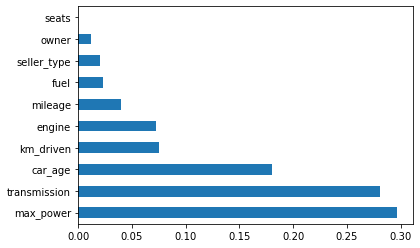

______________________________________________________________________
Getting importance of all features in descending order as a dataframe
______________________________________________________________________


,Features,Importance
7,max_power,0.296595
3,transmission,0.280741
9,car_age,0.180251
0,km_driven,0.075268
6,engine,0.072365
5,mileage,0.040104
1,fuel,0.023119
2,seller_type,0.019829
4,owner,0.011728
8,seats,0.000000


In [36]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x, y)


print(model.feature_importances_)



#plot graph of feature importances for better visualization
print("Plotting graph of feature importances for better visualization")
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(x.shape[1]).plot(kind='barh')
plt.show()

print("_"*70)
#Getting importance of all features in descending order as a dataframe
print("Getting importance of all features in descending order as a dataframe")
print("_"*70)
feat_importances.sort_values(ascending=False)
feature_df=feat_importances.to_frame()
DF=feat_importances.reset_index().rename(columns={"index":"Features", 0:"Importance"})
DF=DF.sort_values(by=['Importance'], ascending=False)
display(DF)

By observing feature importance graph, we can say, seats, owner and seller type are not so important. We can drop them off.

Scalling the data


In [37]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

x_scaled=scale.fit_transform(x)

In [38]:
x_scaled

array([[ 1.77174351, -0.87945986, -0.42300369, ..., -0.52297395,
         0.        , -0.04098942],
       [ 1.18643106, -0.87945986, -0.42300369, ...,  0.52206131,
         0.        , -0.04098942],
       [ 1.64549965,  0.97289819, -0.42300369, ..., -0.38137025,
         0.        ,  2.00294928],
       ...,
       [ 1.18643106, -0.87945986, -0.42300369, ..., -0.52651404,
         0.        ,  1.23647227],
       [-0.99414476, -0.87945986, -0.42300369, ..., -0.66457764,
         0.        ,  0.21450292],
       [-0.99414476, -0.87945986, -0.42300369, ..., -0.66457764,
         0.        ,  0.21450292]])

Since it's an array, so we should convert it into dataframe.

In [39]:
X_scaled=pd.DataFrame(data=x_scaled, columns=x.columns)

In [40]:
X_scaled.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,1.771744,-0.879460,-0.423004,-0.385158,-0.640403,0.987453,-0.400210,-0.522974,0.0,-0.040989
1,1.186431,-0.879460,-0.423004,-0.385158,0.745063,0.413304,0.214066,0.522061,0.0,-0.040989
2,1.645500,0.972898,-0.423004,-0.385158,2.130528,-0.460622,0.211609,-0.381370,0.0,2.002949
3,1.347105,-0.879460,-0.423004,-0.385158,-0.640403,0.885834,-0.036559,0.043441,0.0,0.980980
4,1.186431,0.972898,-0.423004,-0.385158,-0.640403,-0.867099,-0.277355,-0.020281,0.0,1.747457


Checking the distribution of output feature

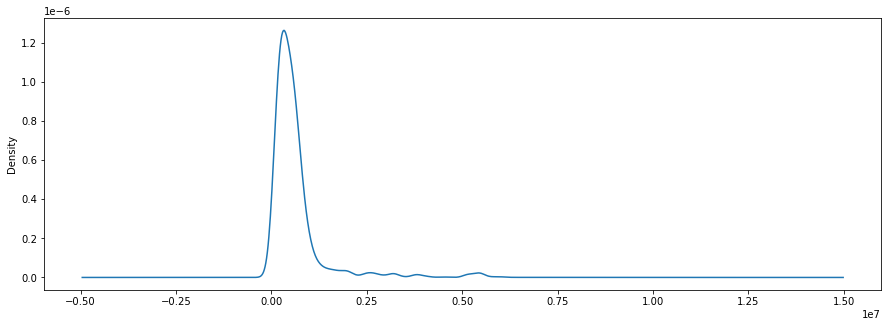

In [41]:
y.plot(kind='kde', figsize=(15,5));

From the above diagram, it is clear that output feature distribution is RIGHT SKEWED. to make it normally distributed, we must perform transformation. (mostly logarithmic transfomation)

In [42]:
y = np.log(y)

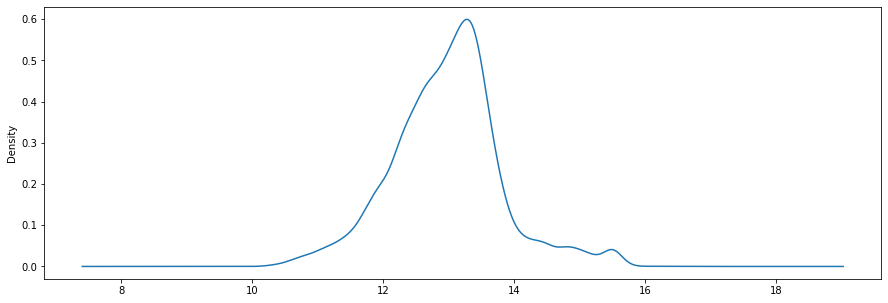

In [43]:
y.plot(kind='kde', figsize=(15,5));

After applyting logarithmic transformation, mostly it is converted into a normally ditributed output feature. 

Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, train_size=0.70)
print("Shape of X train:",X_train.shape)
print("Shape of Y train:",y_train.shape)
print("Shape of X test:",X_test.shape)
print("Shape of Y test:",y_test.shape)

Shape of X train: (5445, 10)
Shape of Y train: (5445,)
Shape of X test: (2683, 10)
Shape of Y test: (2683,)


# REGRESSION MODEL

Definig model evolution metrics

In [46]:
def model_evaluate(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MAE is {}'.format(round(mae, 3)))
    print('MSE is {}'.format(round(mse, 3)))
    print('R2 score is {}'.format(round(r2, 3)))

Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Scores of Linear Regression:")
model_evaluate(y_test,y_pred_lr)

Scores of Linear Regression:
MAE is 0.246
MSE is 0.102
R2 score is 0.854


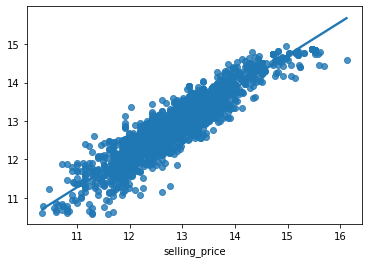

In [48]:
sns.regplot(x=y_test,y=y_pred_lr)
plt.show()

Desicion Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Scores of DT Regression:")
model_evaluate(y_test,y_pred_dt)

Scores of DT Regression:
MAE is 0.189
MSE is 0.085
R2 score is 0.878


In [50]:
parameter={"max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
kf=KFold(n_splits=50)
grid_sv = GridSearchCV(dt, cv=kf, param_grid=parameter, scoring='neg_mean_absolute_error')
grid_sv.fit(X_train, y_train)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : DecisionTreeRegressor(max_depth=12)


In [51]:
parameters=dict(grid_sv.best_params_)
parameters

{'max_depth': 12}

In [52]:
dt = grid_sv.best_estimator_
dt.fit(X_train, y_train)
y_pred_DT=dt.predict(X_test)
print("Scores of DT Regression:")
model_evaluate(y_test,y_pred_DT)

Scores of DT Regression:
MAE is 0.185
MSE is 0.077
R2 score is 0.889


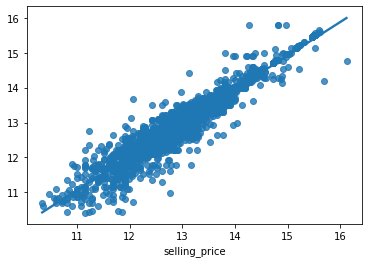

In [53]:
sns.regplot(x=y_test,y=y_pred_DT)
plt.show()

KNN Regressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
print("Scores of KNN Regression:")
model_evaluate(y_test,y_pred_knn)

Scores of KNN Regression:
MAE is 0.203
MSE is 0.084
R2 score is 0.88


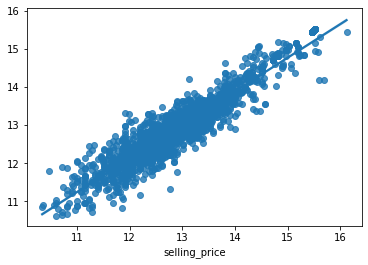

In [55]:
sns.regplot(x=y_test,y=y_pred_knn)
plt.show()

Gredient Boost Regressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)
y_pred_gb=gbr.predict(X_test)
print("Scores of GB Regression:")
model_evaluate(y_test,y_pred_gb)

Scores of GB Regression:
MAE is 0.183
MSE is 0.063
R2 score is 0.91


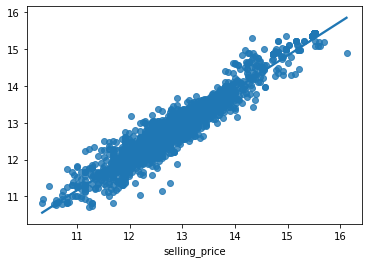

In [57]:
sns.regplot(x=y_test,y=y_pred_gb)
plt.show()

In [58]:
def all_regression_model(x, y):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
    
    print("Shape of X train:",X_train.shape)
    print("Shape of Y train:",y_train.shape)
    print("Shape of X test:",X_test.shape)
    print("Shape of Y test:",y_test.shape)
    print("-"*80)
    print("-"*80)
    
    
    
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import GradientBoostingRegressor




    regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(n_estimators=100,random_state=1,n_jobs=-1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'Gradient Boost' : GradientBoostingRegressor()
    }
    results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
    for method,func in regressors.items():
        model = func.fit(X_train,y_train)
        pred = model.predict(X_test)
        results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                            np.round(mean_squared_error(y_test,pred),3),
                              np.round(r2_score(y_test,pred),3)
                             ]
    
    
    display(results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score']))    

In [59]:
all_regression_model(X_scaled, y)

Shape of X train: (5445, 10)
Shape of Y train: (5445,)
Shape of X test: (2683, 10)
Shape of Y test: (2683,)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


,MAE,MSE,R2-score
Random Forest,0.153000,0.052000,0.925000
Gradient Boost,0.183000,0.063000,0.910000
Decision Tree,0.187000,0.083000,0.882000
Linear Regression,0.246000,0.102000,0.854000
K-nearest Neighbors,0.215000,0.109000,0.844000
